In [1]:
# Install necessary libraries
# !pip install roboflow
# !pip install transformers datasets torch

# # Install YOLOv8
# !pip install ultralytics

from roboflow import Roboflow
rf = Roboflow(api_key="mj1WEV40JVXuIxIiRilw")
project = rf.workspace("tabledetectorv2").project("table-finder-aum80")
version = project.version(4)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.43, to fix: `pip install ultralytics==8.0.196`


In [2]:
import shutil

shutil.move("/content/Table-Finder-4/train",
            "/content/Table-Finder-4/Table-Finder-4/train")
shutil.move("/content/Table-Finder-4/valid",
            "/content/Table-Finder-4/Table-Finder-4/valid")
shutil.move("/content/Table-Finder-4/test",
            "/content/Table-Finder-4/Table-Finder-4/test")

'/content/Table-Finder-4/Table-Finder-4/test'

In [2]:
# !pip install ultralyticsplus==0.0.28 ultralytics==8.0.43
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('foduucom/table-detection-and-extraction')


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/Table-Finder-4/Table-Finder-4/test/images/nyu-official-transcript-2-2048_webp_jpg.rf.bb7f11adede3be37aa6a58cb0d3dd468.jpg: 640x640 2 borderlesss, 16.4ms
Speed: 0.9ms preprocess, 16.4ms inference, 754.0ms postprocess per image at shape (1, 3, 640, 640)


tensor([[7.00000e+00, 6.30000e+01, 6.33000e+02, 5.51000e+02, 8.63243e-01, 1.00000e+00],
        [1.40000e+01, 4.77000e+02, 4.68000e+02, 5.01000e+02, 4.40872e-01, 1.00000e+00]], device='cuda:0')


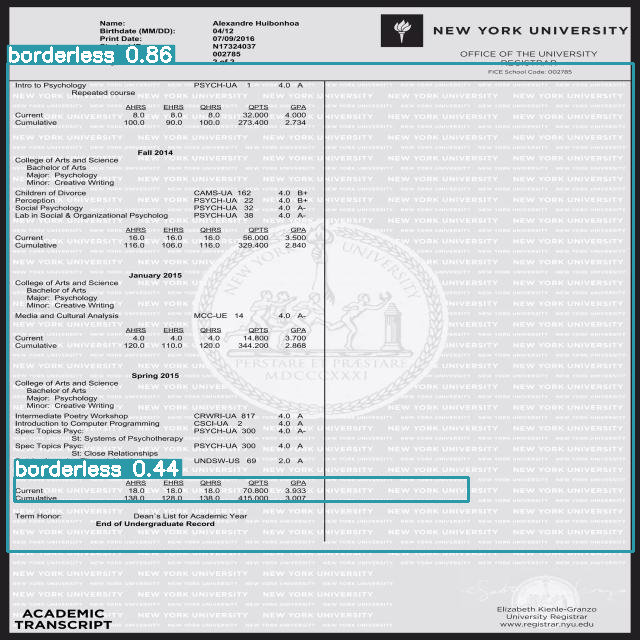

In [4]:
from IPython.display import display, Image
# CHECK BASELINE
# set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image

# set image
image = '/content/Table-Finder-4/Table-Finder-4/test/images/nyu-official-transcript-2-2048_webp_jpg.rf.bb7f11adede3be37aa6a58cb0d3dd468.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])

# Assuming rendered_image is a path to the saved image or an image array
display(render)

In [6]:
import os

# Set the path to your directory
directory_path = '/content/Table-Finder-4/Table-Finder-4/valid/images'

# List all files in the directory
files = os.listdir(directory_path)

# Count the number of files
number_of_files = len([file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])  # Adjust file extensions as necessary

print(f"There are {number_of_files} image files in the directory.")

There are 126 image files in the directory.


In [20]:
print({dataset.location})

{'/content/Table-Finder-4'}


In [7]:
results = model.train(data = '/content/Table-Finder-4/data.yaml', imgsz = 640, epochs = 50, batch = 4, patience = 10, optimizer = 'Adam', lr0 = 0.001, weight_decay = 0.001, val = True, plots = True) #126

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Table-Finder-4/data.yaml, epochs=50, patience=10, batch=4, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=1000, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimi

In [10]:
model = YOLO('/content/runs/detect/train10/weights/best.pt')
results = model.train(data = '/content/Table-Finder-4/data.yaml', imgsz = 640, epochs = 200, batch = 32, patience = 30, optimizer = 'Adam', lr0 = 0.001, weight_decay = 0.001, val = True, plots = True) #126

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/runs/detect/train10/weights/best.pt, data=/content/Table-Finder-4/data.yaml, epochs=200, patience=30, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=1000, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, for

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /content/Table-Finder-4/Table-Finder-4/test/images/Unofficial-Transcript-Report_png_jpg.rf.573aface2ed7d4b5cb3fc43f88961f88.jpg: 640x640 9 headerss, 7 tables, 20.8ms
Speed: 3.4ms preprocess, 20.8ms inference, 6.3ms postprocess per image at shape (1, 3, 640, 640)


tensor([[3.28000e+02, 2.22000e+02, 6.13000e+02, 2.86000e+02, 9.48981e-01, 1.00000e+00],
        [1.00000e+00, 5.54000e+02, 2.90000e+02, 6.05000e+02, 9.48672e-01, 1.00000e+00],
        [2.00000e+00, 3.82000e+02, 2.90000e+02, 4.31000e+02, 8.99120e-01, 1.00000e+00],
        [3.28000e+02, 3.83000e+02, 6.13000e+02, 4.16000e+02, 8.50311e-01, 1.00000e+00],
        [5.00000e+00, 2.45000e+02, 2.96000e+02, 2.56000e+02, 8.28032e-01, 0.00000e+00],
        [9.00000e+00, 3.73000e+02, 2.90000e+02, 3.83000e+02, 8.11085e-01, 0.00000e+00],
        [3.33000e+02, 1.49000e+02, 6.15000e+02, 1.60000e+02, 8.10391e-01, 0.00000e+00],
        [3.32000e+02, 8.50000e+01, 6.14000e+02, 9.60000e+01, 8.07864e-01, 0.00000e+00],
        [5.00000e+00, 5.45000e+02, 2.89000e+02, 5.54000e+02, 8.06090e-01, 0.00000e+00],
        [3.22000e+02, 3.73000e+02, 6.12000e+02, 3.84000e+02, 8.00038e-01, 0.00000e+00],
        [3.30000e+02, 2.12000e+02, 6.12000e+02, 2.23000e+02, 7.94647e-01, 0.00000e+00],
        [3.00000e+00, 4.85000e+0

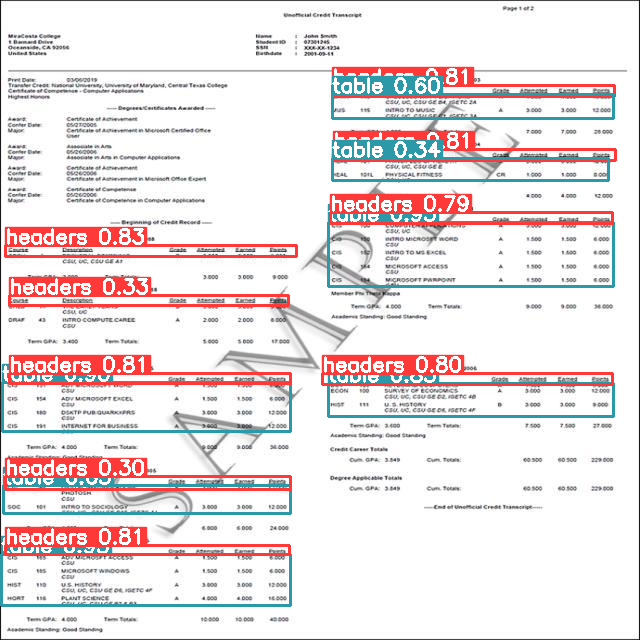

In [11]:
# set image
image = '/content/Table-Finder-4/Table-Finder-4/test/images/Unofficial-Transcript-Report_png_jpg.rf.573aface2ed7d4b5cb3fc43f88961f88.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])

# Assuming rendered_image is a path to the saved image or an image array
display(render)

In [3]:
# Finetune part 2(continue)
from ultralyticsplus import YOLO, render_result

# load model
model = YOLO('/content/best.pt')

In [6]:
results = model.train(data = '/content/Table-Finder-4/data.yaml', imgsz = 1024, epochs = 200, batch = 8, patience = 30, optimizer = 'Adam', lr0 = 0.001, weight_decay = 0.001, val = True, plots = True) #126

Ultralytics YOLOv8.0.43 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/best.pt, data=/content/Table-Finder-4/data.yaml, epochs=200, patience=30, batch=8, imgsz=1024, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, split=val, save_json=False, save_hybrid=False, conf=0.25, iou=0.45, max_det=1000, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False


image 1/1 /content/Table-Finder-4/Table-Finder-4/test/images/transcript-1-2048-1_webp_jpg.rf.e518931e6d0778ccc521833da3a9735d.jpg: 1024x1024 4 headerss, 4 tables, 32.7ms
Speed: 1.3ms preprocess, 32.7ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


tensor([[ 26.00000, 333.00000, 295.00000, 402.00000,   0.88269,   1.00000],
        [331.00000, 249.00000, 601.00000, 304.00000,   0.87780,   1.00000],
        [331.00000, 393.00000, 602.00000, 464.00000,   0.87139,   1.00000],
        [ 25.00000, 493.00000, 297.00000, 555.00000,   0.83940,   1.00000],
        [331.00000, 385.00000, 605.00000, 395.00000,   0.78770,   0.00000],
        [338.00000, 239.00000, 596.00000, 249.00000,   0.76705,   0.00000],
        [ 28.00000, 325.00000, 295.00000, 336.00000,   0.75534,   0.00000],
        [ 26.00000, 484.00000, 298.00000, 494.00000,   0.71961,   0.00000]], device='cuda:0')


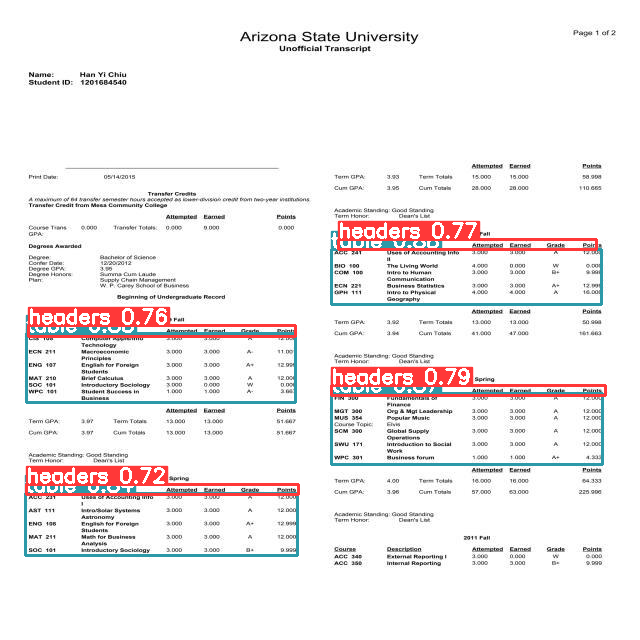

In [8]:
# set image
image = '/content/Table-Finder-4/Table-Finder-4/test/images/transcript-1-2048-1_webp_jpg.rf.e518931e6d0778ccc521833da3a9735d.jpg'

# perform inference
results = model.predict(image)

# observe results
print(results[0].boxes)
render = render_result(model=model, image=image, result=results[0])

# Assuming rendered_image is a path to the saved image or an image array
display(render)